In [ ]:
#fetching the datset from dropbox
!wget https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0

--2021-01-12 06:53:55--  https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra [following]
--2021-01-12 06:53:55--  https://www.dropbox.com/sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceed90a88cb6caa0c28c42c415f.dl.dropboxusercontent.com/zip_download_get/AqNYvhIey2SLaT-9vFHK-cbDvOLbgMQZguGQ4rCeT9c_AE6T2XuogdyIDT1JkKhVwIFsAOozlgQz_wI88EX6kgbtWImTgapoMfccN_VKQCBXIA [following]
--2021-01-12 06:53:56--  https://uceed90a88cb6caa0c28c42c415f.dl.dropboxusercontent.com/zip_download_get/AqNYvhIey2SLaT-9vFHK-cbDvOLbgMQZguGQ4rCeT9c_AE6T2XuogdyIDT1JkKhVwIFsAOozlgQz_wI88

In [ ]:
#unzipping the dataset folder
!unzip Ds

In [ ]:
TRAIN_PATH="Ds/train"

In [ ]:
VAL_PATH="Ds/val"

In [ ]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#model definition
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the mode
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    'train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 652 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [ ]:
#creating the validation function
validation_generator=test_dataset.flow_from_directory(
    'val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 72s 9s/step - loss: 1.0910 - accuracy: 0.5735 - val_loss: 0.6267 - val_accuracy: 0.9844
Epoch 2/20
8/8 [==============================] - 70s 9s/step - loss: 0.3515 - accuracy: 0.8735 - val_loss: 0.1137 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 74s 9s/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 77s 10s/step - loss: 0.0095 - accuracy: 0.9953 - val_loss: 0.2271 - val_accuracy: 0.8438
Epoch 5/20
8/8 [==============================] - 74s 9s/step - loss: 0.0177 - accuracy: 0.9928 - val_loss: 8.4253e-04 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 75s 9s/step - loss: 0.0949 - accuracy: 0.9901 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 78s 10s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 8.0217e-05 - val_accuracy: 1.0000
Epoch 8/20
8/8 [========

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[9.299896191805601e-05, 1.0]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.00016733027587179095, 1.0]

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
import os

In [ ]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
for i in os.listdir("./val/normal/"):
  img=image.load_img("./val/normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

NameError: ignored

In [ ]:
for i in os.listdir("./val/pf/"):
  img=image.load_img("./val/pf/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

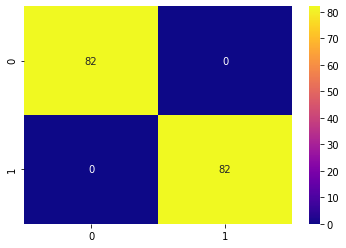

In [ ]:
sns.heatmap(cm, cmap='plasma',annot=True)

In [ ]:
#0->normal, 1->pf
# TP, FN
# FP,TN

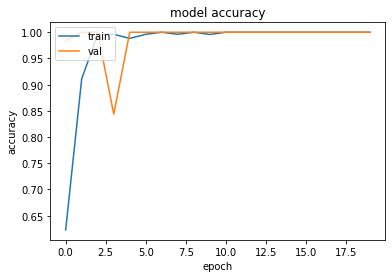

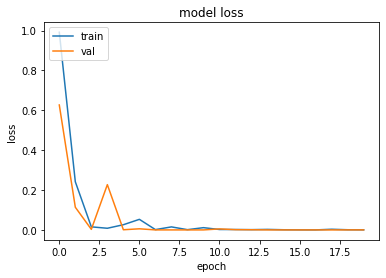

In [ ]:
import matplotlib.pyplot as plt
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()